In [19]:
import pandas as pd
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [ ]:
df_neighborhoods = pd.read_pickle("./dataset/utseus-cendus-shanghai-neighborhoods.pk")

In [129]:
df_neighborhoods

,NAME,TYPE,geometry,restaurant,Bicycle_park,resto2
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...,0,0,0
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...,0,0,0
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...,0,0,0
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...,748,197,27
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...,616,335,13
5,???,2,POLYGON Z ((121.361791867899 30.80039372730244...,1131,333,25
6,???,2,POLYGON Z ((121.1946455066587 30.8145337554495...,86,114,7
7,???,2,POLYGON Z ((121.2968222983408 30.8189104622134...,177,190,3
8,???,2,POLYGON Z ((121.3671342033205 30.8431074654533...,157,238,3
9,???,2,POLYGON Z ((121.174529158719 30.87609875249207...,189,222,5


In [21]:
crs = {'init': 'epsg:4479'}

In [22]:
gdf = gpd.GeoDataFrame(df_neighborhoods, crs=crs, geometry=df_neighborhoods.geometry)

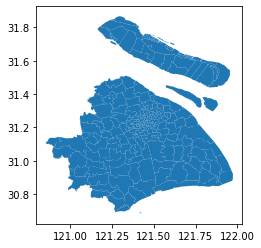

In [23]:
gdf.plot()

## How many POI of each type are in every Polygon?

In [53]:
df_POI_geom = pd.read_pickle("./dataset/savedDF_POI_geom.pkl")
df_POI_geom_resto = df_POI_geom[df_POI_geom['category']=='Restaurant']

In [91]:
df_POI_geom_resto.head()

,NAME,GPSX,GPSY,GBCODE,category,subcategory,subsubcategory,geometry
42654,佳都大厦停车场,121.429483,31.216387,110100.0,Restaurant,Chinese Restaurant,Chinese Restaurant,POINT (121.429483 31.216387)
42655,爵士岛咖啡(殷高西路店)停车场,121.479120,31.322139,110503.0,Restaurant,Leisure Restaurant,Café,POINT (121.47912 31.322139)
94385,天天农家乐,121.465817,31.682416,110100.0,Restaurant,Chinese Restaurant,Chinese Restaurant,POINT (121.465817 31.682416)
94386,缘辉农家乐,121.467229,31.681350,110100.0,Restaurant,Chinese Restaurant,Chinese Restaurant,POINT (121.467229 31.68135)
94387,上海崇明岛海岛人家农家乐(美食),121.878043,31.335275,110100.0,Restaurant,Chinese Restaurant,Chinese Restaurant,POINT (121.878043 31.335275)


In [55]:
from shapely.geometry import Point, Polygon

In [ ]:
nb_restaurant = {}

In [66]:
total = 0
for index, polygon in df_neighborhoods['geometry'].items():
    if index in nb_restaurant:
        continue 
    for index2, point in df_POI_geom_resto['geometry'].items():
        if point.within(polygon) == True:
            total += 1
    nb_restaurant[index] = total
    total = 0

In [89]:
df_neighborhoods['restaurant'] = nb_restaurant.values()

## Bicycle park

In [92]:
df_POI_geom_transport = df_POI_geom[df_POI_geom['category']=='Transportation']
df_POI_geom_transport.head()

,NAME,GPSX,GPSY,GBCODE,category,subcategory,subsubcategory,geometry
59,上海交投沪太路综合客运交通枢纽站,121.413256,31.295093,209900.0,Transportation,Energy accounts for,Bicycle park,POINT (121.413256 31.295093)
60,大卫路与人民路交叉口,121.607344,30.900493,209900.0,Transportation,Energy accounts for,Bicycle park,POINT (121.607344 30.900493)
61,华新街南马巷桥,121.227598,31.247984,209900.0,Transportation,Energy accounts for,Bicycle park,POINT (121.227598 31.247984)
62,外滩(入口),121.417692,31.211181,209900.0,Transportation,Energy accounts for,Bicycle park,POINT (121.417692 31.211181)
63,联谊路出口(联谊路南向),121.430034,31.348542,209900.0,Transportation,Energy accounts for,Bicycle park,POINT (121.430034 31.348542)


In [ ]:
df_bicycle_park = df_POI_geom[df_POI_geom['subsubcategory']=='Bicycle park']

In [123]:
nb_bicyclePark = {}
total = 0
for index, polygon in df_neighborhoods['geometry'].items():
    for index2, point in df_bicycle_park['geometry'].items():
        if point.within(polygon) == True:
            total += 1
    nb_bicyclePark[index] = total
    total = 0

In [127]:
df_neighborhoods['Bicycle_park'] = nb_bicyclePark.values()

In [130]:
df_neighborhoods

,NAME,TYPE,geometry,restaurant,Bicycle_park,resto2
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...,0,0,0
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...,0,0,0
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...,0,0,0
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...,748,197,27
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...,616,335,13
5,???,2,POLYGON Z ((121.361791867899 30.80039372730244...,1131,333,25
6,???,2,POLYGON Z ((121.1946455066587 30.8145337554495...,86,114,7
7,???,2,POLYGON Z ((121.2968222983408 30.8189104622134...,177,190,3
8,???,2,POLYGON Z ((121.3671342033205 30.8431074654533...,157,238,3
9,???,2,POLYGON Z ((121.174529158719 30.87609875249207...,189,222,5


In [107]:
df_neighborhoods.to_pickle("savedDF_neighborhoods.pickle")

In [134]:
def nb_per_district(dataframe):
    nb = {}
    total = 0
    for index, polygon in df_neighborhoods['geometry'].items():
        if index in nb:
            continue 
        for index2, point in dataframe['geometry'].items():
            if point.within(polygon) == True:
                total += 1
        nb[index] = total
        total = 0
    return nb

## Bus terminal

In [140]:
df_bus_terminal = df_POI_geom[df_POI_geom['subsubcategory']=='Bus Terminal']

In [142]:
bus = nb_per_district(df_bus_terminal)

In [144]:
df_neighborhoods['Bus'] = bus.values()

## Railway station entrance and exit

In [148]:
df_railway = df_POI_geom[df_POI_geom['subsubcategory']=='Railway station entrance and exit']

In [149]:
railway = nb_per_district(df_railway)

In [151]:
df_neighborhoods['Railway_station_entrance_exit'] = railway.values()

## Convenience Store

In [157]:
df_shop = df_POI_geom[df_POI_geom['category']=='Shopping']

In [161]:
df_convenience_store = df_shop[df_shop['subsubcategory']=="Convenience Store"]

In [163]:
len(df_convenience_store)

26533

In [164]:
cv = nb_per_district(df_convenience_store)

In [166]:
df_neighborhoods['Convenience Store'] = cv.values()

## Scenic spot

In [169]:
df_scenic_spot = df_POI_geom[df_POI_geom['category']=='Scenic spot']

In [171]:
scenic_spot = nb_per_district(df_scenic_spot)

In [173]:
df_neighborhoods['Scenic_spot'] = scenic_spot.values()

In [181]:
df_neighborhoods.to_pickle("savedDF_POI_per_district.pickle")

## Sport and leisure

In [176]:
df_sport = df_POI_geom[df_POI_geom['category']=='Sports and leisure']

In [177]:
sport = nb_per_district(df_sport)

In [179]:
df_neighborhoods['Sport'] = sport.values()